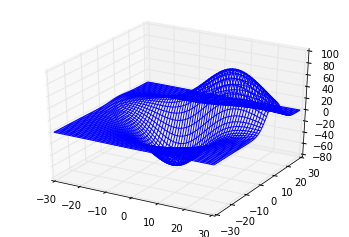

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.01)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

0.00025


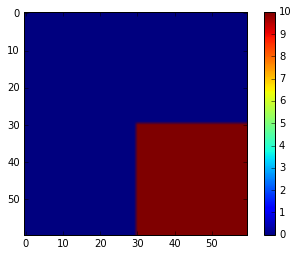

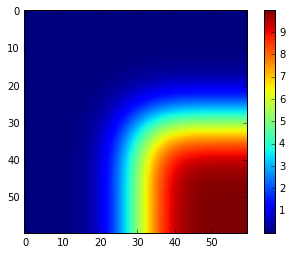

In [113]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dx = 0.1

_, _, Z = axes3d.get_test_data(dx)

Z = np.zeros_like(Z)
Z[int(len(Z)/2):,int(len(Z)/2):] = 10.

# x = np.arange(0,len(Z)*dx,dx)
# y = np.arange(0,len(Z)*dx,dx)

# xv, yv = np.meshgrid(x, y)

# Sx, Sy = np.gradient(Z)

# plt.imshow(Z, cmap = 'terrain')
# plt.colorbar()
# plt.show()
# plt.imshow(Sx)
# plt.colorbar()
# plt.show()
# plt.imshow(Sy)
# plt.colorbar()
# plt.show()

dt = (1/(2*D))*(dx**4/(2*dx**2))
print dt
D = 10.
maxt = 100

# plt.imshow(Z, clim = [-75,85])
plt.imshow(Z)
plt.colorbar()
plt.show()

for t in range(maxt):
    
    old_Z = Z.copy()

    for i in range(1,len(Z)-1):
        for j in range(1,len(Z)-1):

            Zxx = (old_Z[i+1,j] - 2 * old_Z[i,j] + old_Z[i-1,j]) / dx**2
            Zyy = (old_Z[i,j+1] - 2 * old_Z[i,j] + old_Z[i,j-1]) / dx**2
            Z[i,j] = old_Z[i,j] + dt * D * (Zxx + Zyy)
            
    
    Z[0,:] = Z[1,:]
    Z[-1,:] = Z[-2,:]
    Z[:,0] = Z[:,1]
    Z[:,-1] = Z[:,-2]


# plt.imshow(Z, clim = [-75,85])
plt.imshow(Z)
plt.colorbar()
plt.show()

In [103]:
_, _, Z = axes3d.get_test_data(dx)
Z.max()
Z.min()

-73.232473342912314

In [105]:
Z.max()
Z.min()

-72.655155735917262

In [65]:
len(X)*dx

60.0

In [66]:
dx

0.1